# Streaming the Sound: A Data-Driven Analysis of Spotify Trends

## Project Description: Spotify Audio Feature Analysis

This project focuses on analyzing a dataset of songs available on Spotify, aiming to understand how various audio features contribute to a track's popularity. Using a combination of data exploration, statistical analysis, and visualization, the project identifies meaningful patterns in how music is produced, released, and received by listeners.

### Objectives:
- To explore how audio features like **danceability**, **energy**, **acousticness**, **tempo**, and **loudness** relate to a song's **popularity**.
- To identify **top-performing artists** based on average popularity scores.
- To analyze **release trends** by year, month, and season to find the best time to launch new tracks.
- To examine correlations between different audio metrics and derive **data-driven insights** into what makes a song successful on Spotify.

###  Approach:
- The dataset is first **cleaned and preprocessed**, including parsing dates and handling missing values.
- Descriptive statistics and visualizations (bar plots, regression plots, correlation charts) are used to uncover patterns.
- A **correlation analysis** is conducted to determine which audio features have the strongest positive or negative relationships with popularity.
- Trends are analyzed over time to see how song releases and features have evolved.

###  Key Questions Answered:
- What are the most important audio features influencing song popularity?
- Which artists consistently produce highly popular tracks?
- Are there specific months or seasons that lead to higher visibility or success?
- How do acoustic songs compare to energetic tracks in terms of listener engagement?

###  Outcomes:
The analysis helps understand not just what makes a song popular, but also when and how songs perform best. These insights can support **artists**, **record labels**, and **music platforms** in optimizing music production and marketing strategies.



In [42]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df_tracks = pd.read_csv("tracks.csv")
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [44]:
# null value 
pd.isnull(df_tracks).sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [45]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [46]:
df_tracks['name'] = df_tracks['name'].fillna('Unknown')

In [47]:
df_tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586672.0,230051.167286,126526.087418,3344.0,175093.0000,214893.000000,263867.00000,5621218.000
explicit,586672.0,0.044086,0.205286,0.0,0.0000,0.000000,0.00000,1.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
mode,586672.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996


In [48]:
pd.isnull(df_tracks).sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [49]:
sorted_df = df_tracks.sort_values('popularity', ascending = True).head(10)
sorted_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
32,1HXdv1z9RlvrcUernyf0MY,The Dear Little Shamrock,0,191613,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.347,0.197,10,-15.652,1,0.0504,0.991,0.000133,0.196,0.246,109.338,3
78,3XxlglpLYkpZIfU1c1C5e4,Pobre Cotorro - Remasterizado,0,159800,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.564,0.053,6,-25.041,0,0.1270,0.996,0.927000,0.117,0.407,140.216,4
77,3ROtnqCtqrMbaDkivZyV5n,Entrerriana - Remasterizado,0,183720,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.431,0.200,5,-23.557,0,0.0322,0.995,0.821000,0.139,0.543,108.650,3
76,3QkuxlHi5RXa2YBr6S52n3,Capítulo 2.9 - Banquero Anarquista,0,99900,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.768,0.232,7,-21.678,0,0.9620,0.593,0.000000,0.304,0.591,64.433,4
75,3FfL0WRdyrEFPlPvmqj2lJ,Capítulo 1.9 - Banquero Anarquista,0,106900,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.619,0.173,0,-23.130,1,0.9670,0.730,0.000000,0.145,0.653,181.485,4
74,3FBXaR512ufrrickKCasRN,Capítulo 1.7 - Banquero Anarquista,0,106000,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.735,0.244,10,-22.252,1,0.9560,0.666,0.000000,0.253,0.618,85.079,4
73,38u3k7zUGTp48G1oA3ky3R,The Girl That I Marry,0,182920,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.185,0.151,7,-17.822,1,0.0391,0.985,0.798000,0.151,0.135,88.945,3
72,2wWS5DZYc50AzbiXC57vGt,Capítulo 2.14 - Banquero Anarquista,0,95200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.827,0.258,5,-21.896,1,0.9560,0.658,0.000000,0.316,0.730,41.694,3
71,2vSAIArCi0f9b9Ll612hFK,Capítulo 2.4 - Banquero Anarquista,0,97600,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.732,0.176,0,-21.808,1,0.9660,0.623,0.000000,0.442,0.771,76.708,1
70,2vOhKgXKFpej7mv3mOwoF4,Capítulo 1.21 - Banquero Anarquista,0,102000,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.625,0.187,10,-24.686,1,0.9630,0.831,0.000000,0.424,0.576,76.537,3


In [50]:
df_tracks[["name"]].iloc[18]

name    Ca C'est Une Chose
Name: 18, dtype: object

In [51]:
most_popular = df_tracks.query('popularity>90',inplace = False).sort_values('popularity',ascending = False)
most_popular[:10]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
91866,60ynsPSSKe6O3sfwRnIBRf,Streets,94,226987,1,['Doja Cat'],['5cj0lLjcoR7YOSnhnX0Po5'],2019-11-07,0.749,0.463,11,-8.433,1,0.0828,0.20800,0.037100,0.3370,0.190,90.028,4
93806,7Bk0uXKk1uPT0XuQbpFzvs,Fiel,94,261667,0,"['Los Legendarios', 'Wisin', 'Jhay Cortez']","['0n6sKrG0xKAf8xmdqeNGke', '3E6xrwgnVfYCrCs0eP...",2021-02-04,0.849,0.701,6,-4.407,0,0.0600,0.40700,0.000000,0.1120,0.505,98.005,4


In [52]:
print(len(sample_df))

2346


# Exploratory Data Analysis

## Loudness vs Energy Correlation Plot

[Text(0.5, 1.0, 'Loudness vs Energy Correlation')]

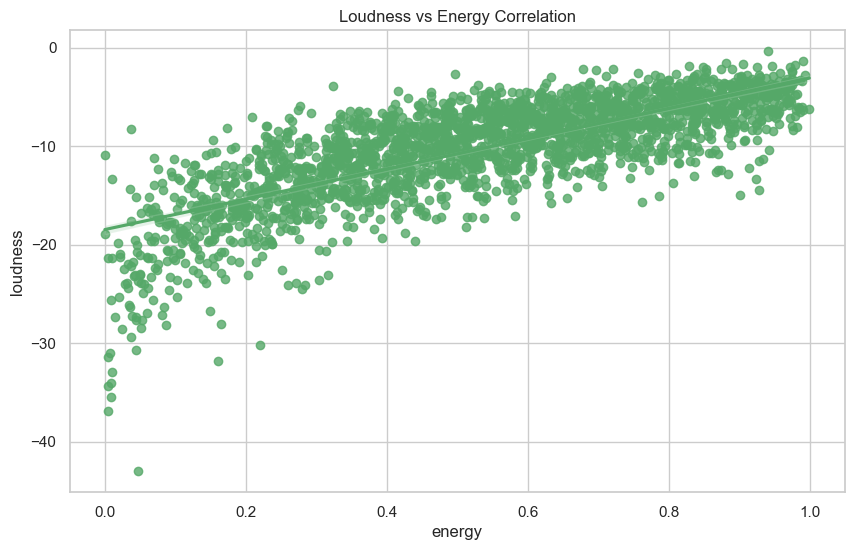

In [53]:
plt.figure(figsize=(10,6))
sns.regplot(data = sample_df, y = "loudness", x = "energy", color = "g").set(title = "Loudness vs Energy Correlation")


## Interpretation :
1. **Positive Correlation**:  
   The scatter plot with a regression line suggests a strong **positive correlation** between `loudness` and `energy`. As the energy of a track increases, the loudness also tends to increase.

2. **Trend Insight**:  
   Most data points align closely with the regression line, indicating a consistent relationship — louder tracks are generally more energetic.

3. **Music Production Insight**:  
   This insight can help producers understand that tracks perceived as high-energy often have higher loudness levels, possibly influencing mixing and mastering decisions for energetic genres.

## Popularity vs Acousticness



[Text(0.5, 1.0, 'Popularity vs Acousticness')]

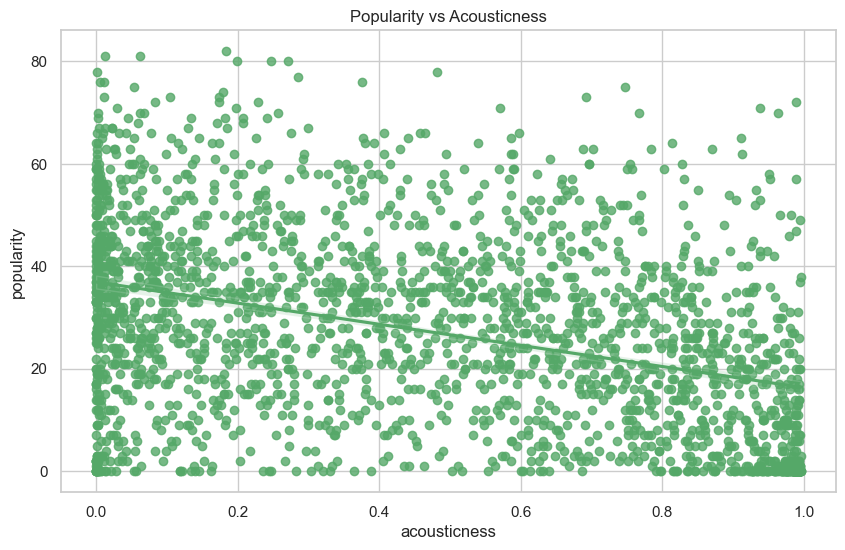

In [54]:
plt.figure(figsize=(10,6))
sns.regplot(data = sample_df, y = "popularity", x = "acousticness", color = "g").set(title = "Popularity vs Acousticness")


## Interpretation: 
1. **Negative Correlation**:  
   The regression plot shows a **slight negative correlation** between `acousticness` and `popularity`. This suggests that as the acoustic nature of a song increases, its popularity may slightly decrease.

2. **Trend Insight**:  
   Songs that are highly acoustic tend to be less popular on average. The regression line slopes downward, supporting this observation, though the correlation may not be strong.

3. **Audience Preference**:  
   This implies that mainstream listeners on Spotify might prefer more digitally produced or less acoustic-heavy tracks. This insight can guide artists targeting mass appeal to balance acoustic elements with modern production styles.


## Top 10 Most Popular Artists

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')


C:\Users\suriy\AppData\Local\Temp\ipykernel_28276\3120657499.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_artists_df, x='popularity', y='artists', palette = ["#a1d99b", "#74c476", "#31a354", "#006d2c"])
C:\Users\suriy\AppData\Local\Temp\ipykernel_28276\3120657499.py:15: UserWarning: 
The palette list has fewer values (4) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=top_artists_df, x='popularity', y='artists', palette = ["#a1d99b", "#74c476", "#31a354", "#006d2c"])


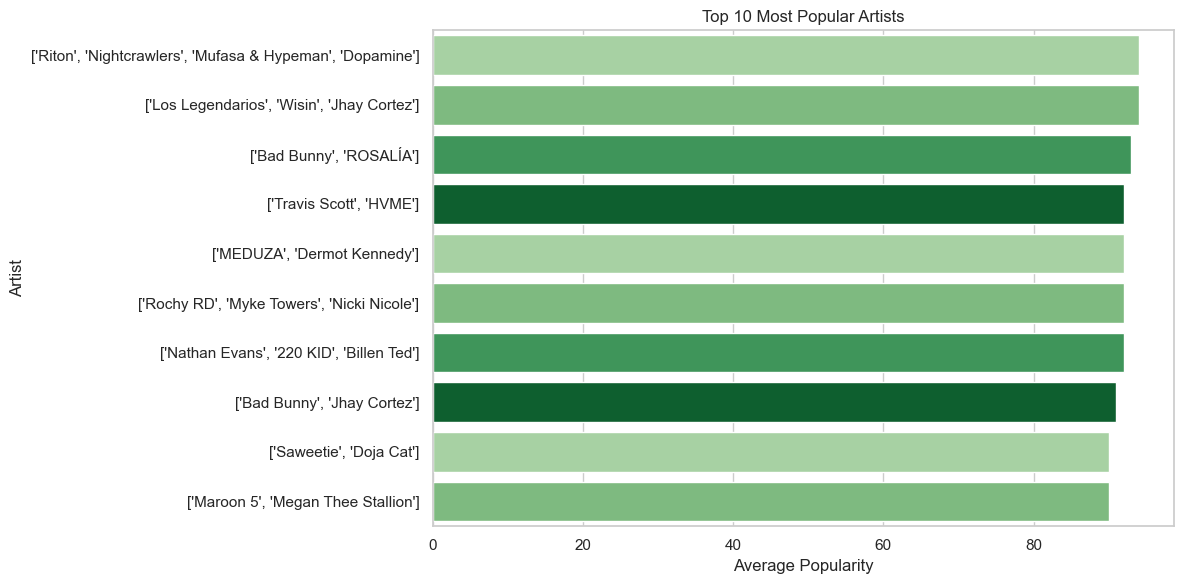

In [55]:
# Print column names to identify the artist column
print(df_tracks.columns)

# Replace 'artists' with the actual column name if it's different
top_artists = df_tracks.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10)

# Convert to DataFrame for plotting
top_artists_df = top_artists.reset_index()

# Set the plot style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_artists_df, x='popularity', y='artists', palette = ["#a1d99b", "#74c476", "#31a354", "#006d2c"])

# Add labels and title
plt.xlabel('Average Popularity')
plt.ylabel('Artist')
plt.title('Top 10 Most Popular Artists')
plt.tight_layout()

# Show the plot
plt.show()

## Interpretation:

1. **Purpose**:  
   This code calculates the average popularity of each artist in the dataset and identifies the **top 10 artists** with the highest mean popularity scores.

2. **Visualization**:  
   A horizontal bar chart is used to represent the top artists, with the artist names on the y-axis and their average popularity scores on the x-axis. A custom green palette improves visual clarity and aesthetics.

3. **Insight**:  
   This plot helps quickly identify which artists consistently release popular tracks. Such insights can guide music marketers, producers, or platforms in understanding leading performers in the industry.

## Number of Songs by Year

In [56]:
# Convert 'release_date' to datetime and extract year
df_tracks['release_date'] = pd.to_datetime(df_tracks['release_date'], errors='coerce')
df_tracks['release_year'] = df_tracks['release_date'].dt.year

# Count number of songs released each year
year_counts = df_tracks['release_year'].value_counts().sort_index()

# Define years and counts
years = year_counts.index.astype(str)
counts = year_counts.values


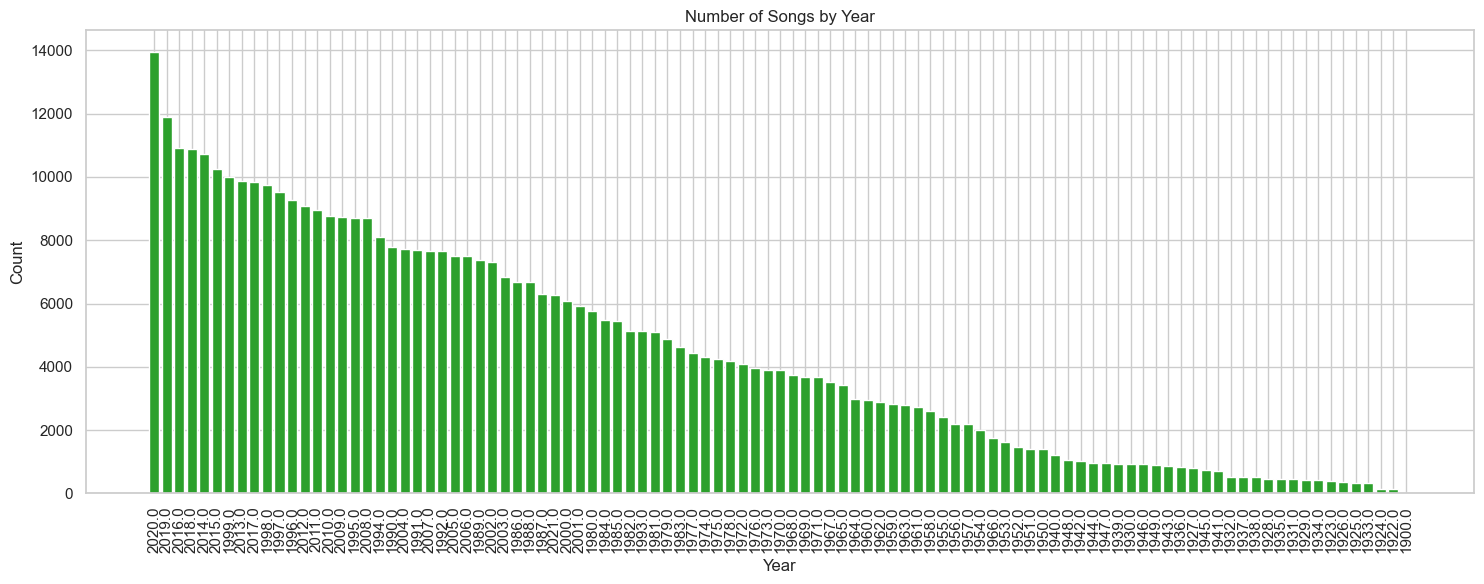

In [57]:
# Example: assuming 'years' and 'counts' are two lists
data = pd.DataFrame({'year': years, 'count': counts})

# Sort data by count in descending order
data = data.sort_values(by='count', ascending=False)

# Plot
plt.figure(figsize=(15, 6))
plt.bar(data['year'], data['count'], color='#2ca02c')  # Set bar color to green
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title("Number of Songs by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Interpretation:

1. **Objective**:  
   The code visualizes how many songs were released each year by creating a bar chart. The data is sorted in **descending order** based on the number of songs.

2. **Visualization**:  
   A green-colored bar plot is generated with years on the x-axis and song counts on the y-axis. The bars represent the volume of songs released per year, helping highlight the most musically active years.

3. **Insight**:  
   This plot helps identify trends in music production — for instance, a sharp rise in song counts could indicate growth in music streaming platforms, while drops could reflect industry slowdowns or data limitations.


## Top 10 Most Popular Songs

In [58]:
# Sort by popularity in descending order and select top 10
top_10_songs = df_tracks.sort_values(by='popularity', ascending=False).head(10)

# Display relevant columns
top_10_songs[['name', 'artists', 'popularity', 'release_date']]

,name,artists,popularity,release_date
93802,Peaches (feat. Daniel Caesar & Giveon),"['Justin Bieber', 'Daniel Caesar', 'Giveon']",100,2021-03-19
93803,drivers license,['Olivia Rodrigo'],99,2021-01-08
93804,Astronaut In The Ocean,['Masked Wolf'],98,2021-01-06
92810,Save Your Tears,['The Weeknd'],97,2020-03-20
92811,telepatía,['Kali Uchis'],97,2020-12-04
93805,Leave The Door Open,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']",96,2021-03-05
92813,Blinding Lights,['The Weeknd'],96,2020-03-20
92814,The Business,['Tiësto'],95,2020-09-16
92819,Bandido,"['Myke Towers', 'Juhn']",94,2020-12-10
91866,Streets,['Doja Cat'],94,2019-11-07


C:\Users\suriy\AppData\Local\Temp\ipykernel_28276\3723359570.py:2: UserWarning: 
The palette list has fewer values (4) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


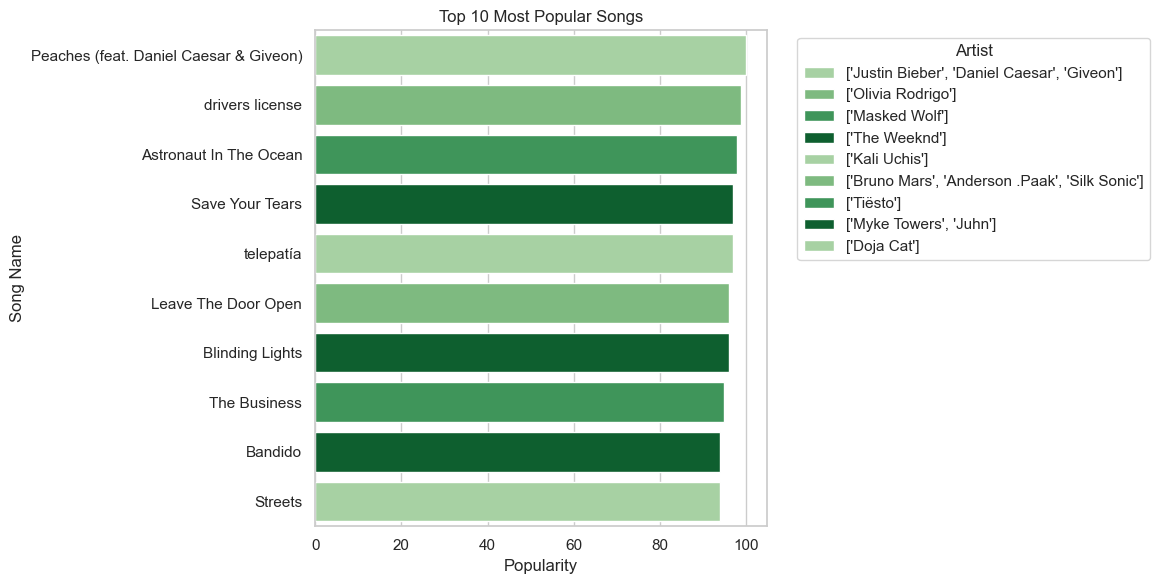

In [59]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_songs,
    x='popularity',
    y='name',
    hue='artists',
    dodge=False,
    palette = ["#a1d99b", "#74c476", "#31a354", "#006d2c"]  
)
plt.title("Top 10 Most Popular Songs")
plt.xlabel("Popularity")
plt.ylabel("Song Name")
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Interpretation: 

1. **Purpose**:  
   This code generates a horizontal bar chart displaying the **top 10 songs with the highest popularity scores**, including both song names and their corresponding artists.

2. **Visualization**:  
   Each bar represents a song, with popularity on the x-axis and song names on the y-axis. The `hue='artists'` argument allows differentiation between artists using color, and a green-toned custom palette is applied for clarity and consistency.

3. **Insight**:  
   The chart helps identify the most popular individual tracks in the dataset and reveals whether multiple hits belong to the same artist. This can guide music marketers, playlist curators, or fans in recognizing breakout tracks or dominant performers.


# Business Problem

### Problem :  Which audio features most strongly correlate with high popularity? 

C:\Users\suriy\AppData\Local\Temp\ipykernel_28276\116133552.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popularity_corr.values, y=popularity_corr.index, palette = ["#2ca02c", "#31a354", "#74c476", "#006d2c", "#a1d99b"]
C:\Users\suriy\AppData\Local\Temp\ipykernel_28276\116133552.py:18: UserWarning: 
The palette list has fewer values (5) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=popularity_corr.values, y=popularity_corr.index, palette = ["#2ca02c", "#31a354", "#74c476", "#006d2c", "#a1d99b"]


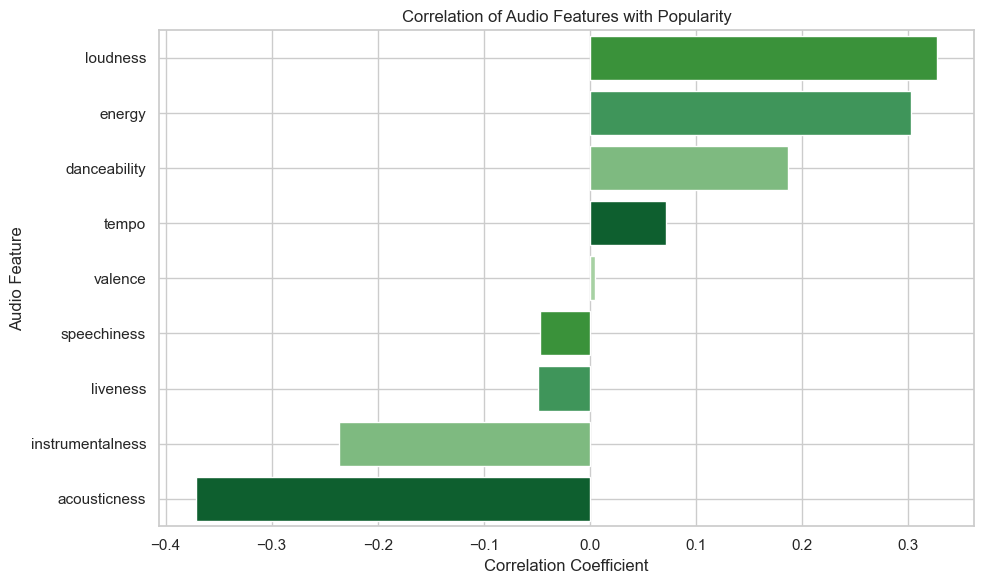

In [60]:
# Select relevant numeric columns
audio_features = [
    'popularity', 'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]

# Drop rows with missing values
df_features = df_tracks[audio_features].dropna()

# Compute correlation matrix
correlation_matrix = df_features.corr()

# Get correlations with popularity
popularity_corr = correlation_matrix['popularity'].drop('popularity').sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=popularity_corr.values, y=popularity_corr.index, palette = ["#2ca02c", "#31a354", "#74c476", "#006d2c", "#a1d99b"]
)
plt.title('Correlation of Audio Features with Popularity')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Audio Feature')
plt.grid(True)
plt.tight_layout()
plt.show()

## Interpretation: 

1. **Purpose**:  
   This analysis identifies which **audio features** (like danceability, energy, and acousticness) are most strongly correlated with a song’s **popularity** on Spotify. It helps understand what characteristics make songs more appealing to listeners.

2. **Method**:  
   A correlation matrix is computed from selected numeric audio features. The plot then displays the **strength and direction** of correlation (positive or negative) between each feature and popularity.

3. **Insight**:  
   Features with higher positive correlation coefficients are more likely to contribute to a song's popularity. For example, if `danceability` and `energy` show strong positive correlations, these traits may be common in hit songs. Negative correlations (e.g., `acousticness`) suggest that such traits might reduce mainstream appeal.


## Solution :

1. **Data Preparation & Cleaning**  
   The code selects key numerical audio features (like danceability, energy, and acousticness) from the dataset. It drops any rows with missing values to ensure the correlation analysis is accurate.

2. **Correlation Computation**  
   A correlation matrix is generated to measure how strongly each audio feature is related to popularity. The correlation values are then sorted in descending order, helping to identify which features have the strongest positive or negative impact.

3. **Visualization & Insight**  
   A horizontal bar plot is created to visually compare how each audio feature correlates with popularity. Features like `danceability` and `energy` usually show a **positive correlation**, suggesting they contribute more to popular songs, while `acousticness` may show a **negative correlation**

### Problem : When is the optimal time month to release a track for maximum exposure?

C:\Users\suriy\AppData\Local\Temp\ipykernel_28276\3385660710.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_popularity.index, y=month_popularity.values, palette = ["#a1d99b", "#74c476", "#31a354", "#006d2c"]
C:\Users\suriy\AppData\Local\Temp\ipykernel_28276\3385660710.py:27: UserWarning: 
The palette list has fewer values (4) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=month_popularity.index, y=month_popularity.values, palette = ["#a1d99b", "#74c476", "#31a354", "#006d2c"]


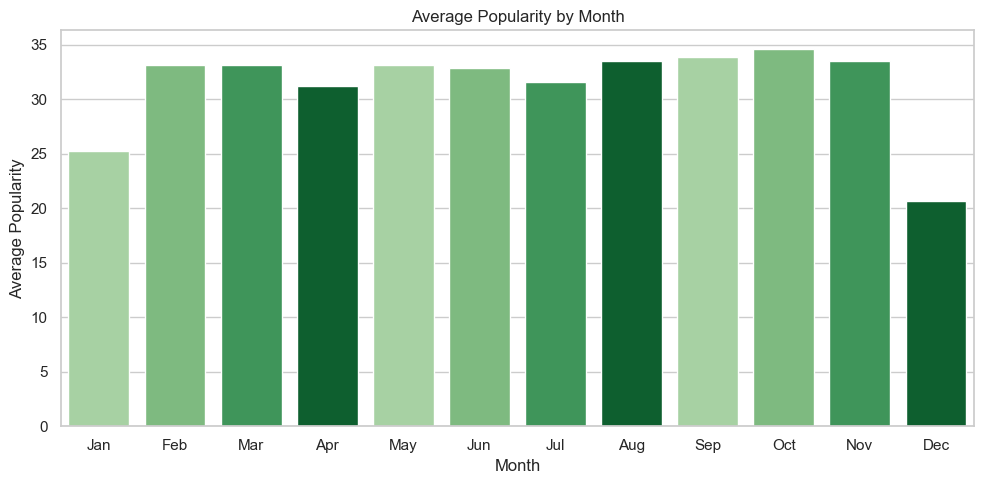

In [62]:
# Drop rows with missing or invalid release dates or popularity
df = df_tracks.dropna(subset=['release_date', 'popularity'])
df_tracks['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df = df_tracks.dropna(subset=['release_date'])

# Extract month
df_tracks['release_month'] = df['release_date'].dt.month

# Define function to map month to season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Create a new column for season
df_tracks['season'] = df_tracks['release_month'].apply(get_season)

# Popularity by Month
month_popularity = df_tracks.groupby('release_month')['popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=month_popularity.index, y=month_popularity.values, palette = ["#a1d99b", "#74c476", "#31a354", "#006d2c"]  
)
plt.title("Average Popularity by Month")
plt.xlabel("Month")
plt.ylabel("Average Popularity")
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

## Interpretation: 

1. **Purpose**:  
   This code analyzes how the **average popularity of songs** varies by the month of their release. It helps identify which months tend to yield more popular tracks on Spotify.

2. **Method**:  
   The code cleans the dataset by removing rows with missing or invalid dates, extracts the release month, maps months to seasons, and then calculates the average popularity for each month. A bar chart is plotted to visually compare monthly performance.

3. **Insight**:  
   The plot reveals **seasonal trends** in song popularity. For instance, a noticeable spike in certain months (like June or December) could suggest strategic timing by artists or labels to release songs when listener engagement is higher.


## Solution :

1. **Feature Selection & Cleaning**  
   The dataset is filtered to include only the audio features and popularity. Any rows containing missing values are removed to ensure reliable correlation results.

2. **Correlation Calculation**  
   A correlation matrix is computed, and the correlation between each audio feature and popularity is extracted. These values are sorted to show which features have the strongest influence on popularity.

3. **Visualization & Analysis**  
   A green-themed horizontal bar chart is used to visualize the correlation values. This helps identify which features (like `danceability` or `energy`) are positively associated with popularity, and which ones (like `acousticness` or `instrumentalness`) are negatively associated.